# Milestone 2
## i. Introduction
Nama : Darmawan Wijaya </br>
Kelas : FTDS - 002 </br>
Obyektif : Mengaplikasikan konsep Supervised Learning untuk memprediksi approval dari proposal pengajuan kredit

## ii. Import Pustaka
Pustaka yang digunakan pada proyek ini adalah:</br>
1. Numpy
2. Pandas
3. Scikit Learn
4. Matplotlib
5. Seaborn

In [1]:
#Proses import dari pustaka yang digunakan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import joblib

#Kode tambahan untuk menampilkan angka desimal maksimal 5 angka dibelakang koma sehingga angka lebih mudah dipahami
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## iii. Data Loading
Data yang digunakan adalah data pengajuan pinjaman konsumer yang berisikan: </br>
1. Pendapatan
2. Umur
3. Lama bekerja 
4. Status Pernikahan
5. Jumlah tanggungan
6. Nominal Pengajuan
7. Pendidikan
8. Status pengajuan
9. Dan parameter-parameter lainnya</br>

Data tersebut dapat diunduh pada : https://www.kaggle.com/vipin20/loan-application-data


In [2]:
#Proses Loading Data
df = pd.read_csv("df1_loan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.00000,NaN,360.00000,1.00000,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00000,128.00000,360.00000,1.00000,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00000,66.00000,360.00000,1.00000,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00000,120.00000,360.00000,1.00000,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.00000,141.00000,360.00000,1.00000,Urban,Y,$6000.0


## iv. Data Cleaning
Data cleaning adalah proses penyiapan data sebelum dilakukan eksplorasi dan pengolahan data lebih lanjut. </br>
Proses data cleaning yang digunakan pada proyek ini adalah: </br>
1. Pengecekan Data Duplikat
2. Pengecekan Missing Values

In [4]:
#Proses Pengecekan Data Duplikat
duplicate = df[df.duplicated()]
duplicate

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income


In [5]:
#Pengecekan data missing values
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

Dari perhitungan diatas, didapatkan bahwa terdapat missing data pada kolom: </br>
1. Gender sebanyak 9 data
2. Married sebanyak 3 data
3. Dependents sebanyak 12 data
4. Self-Employed sebanyak 27 data
5. Loan Ammount sebanyak 18 data
6. Loan Ammount Term sebanyak 14 data
7. Credit History sebanyak 41 data

Untuk missing values dengan jenis kategorikal akan kami lakukan imputasi berdasarkan modus. </br>
Untuk missing values dengan jenis numerikal akan kami lakukan imputasi berdasarkan median. </br>
Kami juga akan melakukan penghapusan kolom Unamed:0.

In [6]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [7]:
df_cleaned = df.copy()
df_cleaned['Gender'].fillna(df_cleaned['Gender'].mode()[0],inplace=True)
df_cleaned['Married'].fillna(df_cleaned['Married'].mode()[0],inplace=True)
df_cleaned['Dependents'].fillna(df_cleaned['Dependents'].mode()[0],inplace=True)
df_cleaned['Self_Employed'].fillna(df_cleaned['Self_Employed'].mode()[0],inplace=True)
df_cleaned['Loan_Amount_Term'].fillna(df_cleaned['Loan_Amount_Term'].mode()[0],inplace=True)
df_cleaned['Credit_History'].fillna(df_cleaned['Credit_History'].mode()[0],inplace=True)
df_cleaned['LoanAmount'].fillna(df_cleaned['LoanAmount'].mean(),inplace=True)
df_cleaned.drop(columns=['Unnamed: 0','Loan_ID'], inplace=True)

In [8]:
#Melakukan perubahan tipe data pada Total Income dan Dependents
df_cleaned['Total_Income']=df_cleaned['Total_Income'].str.replace('$','')
df_cleaned['Dependents']=df_cleaned['Dependents'].str.replace('+','')
df_cleaned["Dependents"]=df_cleaned["Dependents"].apply(pd.to_numeric)
df_cleaned["Total_Income"]=df_cleaned["Total_Income"].apply(pd.to_numeric)


<ipython-input-8-dc125ce34096>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cleaned['Total_Income']=df_cleaned['Total_Income'].str.replace('$','')
<ipython-input-8-dc125ce34096>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cleaned['Dependents']=df_cleaned['Dependents'].str.replace('+','')


## v. Data Exploration

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             500 non-null    object 
 1   Married            500 non-null    object 
 2   Dependents         500 non-null    int64  
 3   Education          500 non-null    object 
 4   Self_Employed      500 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         500 non-null    float64
 8   Loan_Amount_Term   500 non-null    float64
 9   Credit_History     500 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
 12  Total_Income       500 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 50.9+ KB


In [10]:
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.00000,144.02075,360.00000,1.00000,Urban,Y,5849.00000
1,Male,Yes,1,Graduate,No,4583,1508.00000,128.00000,360.00000,1.00000,Rural,N,6091.00000
2,Male,Yes,0,Graduate,Yes,3000,0.00000,66.00000,360.00000,1.00000,Urban,Y,3000.00000
3,Male,Yes,0,Not Graduate,No,2583,2358.00000,120.00000,360.00000,1.00000,Urban,Y,4941.00000
4,Male,No,0,Graduate,No,6000,0.00000,141.00000,360.00000,1.00000,Urban,Y,6000.00000


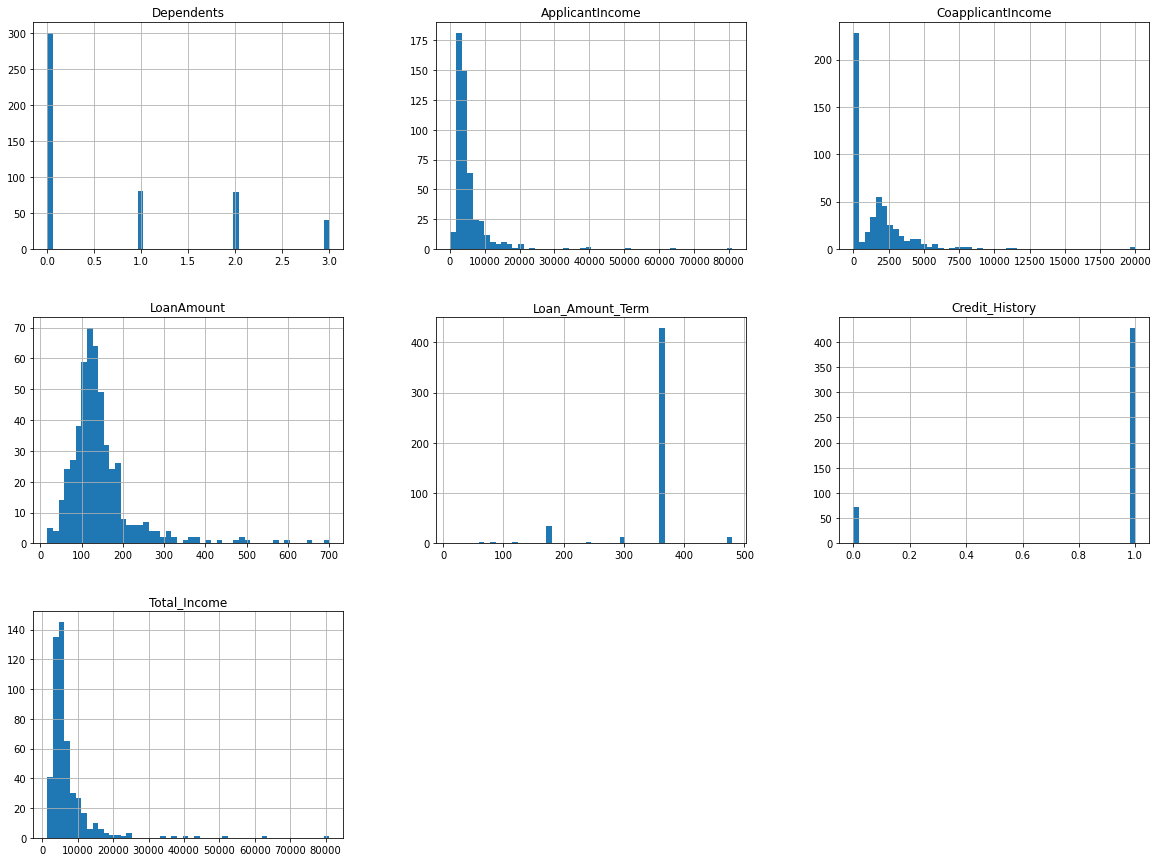

In [11]:
df_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

### Explore Loan Status

In [12]:
print(df_cleaned.Loan_Status.value_counts())
print(df_cleaned.Loan_Status.value_counts()*100/len(df))


Y    345
N    155
Name: Loan_Status, dtype: int64
Y   69.00000
N   31.00000
Name: Loan_Status, dtype: float64


<AxesSubplot:ylabel='Loan_Status'>

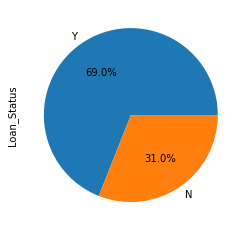

In [13]:
df_cleaned.Loan_Status.value_counts().plot(kind = 'pie',autopct='%1.1f%%')

Dari keseluruhan data, terdapat 69% data yang mendapatkan pinjaman, dan sisanya sebesar 31.0% tidak mendapatkan pinjaman

### Explore Gender

In [14]:
gender = df_cleaned.groupby(['Gender','Loan_Status']).size().reset_index(name='Count')
gender['percentage_gender'] = gender['Count'].div(gender.groupby('Gender')['Count'].transform('sum')).mul(100)
gender

,Gender,Loan_Status,Count,percentage_gender
0,Female,N,31,34.06593
1,Female,Y,60,65.93407
2,Male,N,124,30.31785
3,Male,Y,285,69.68215


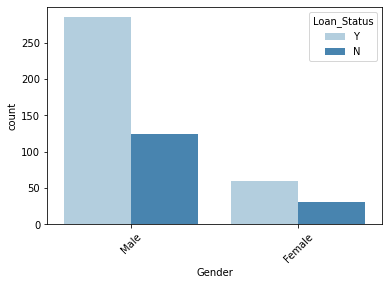

In [15]:
sns.countplot(data=df_cleaned, x="Gender", hue="Loan_Status" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari data Gender kami dapatkan insight bahwa:</br>
1. Sebagian besar peminjam memiliki Gender Pria
2. Rata-rata pengajuan pinjaman dengan peminjam yang memiliki Gender Wanita, lebih cenderung untuk ditolak daripada Pria

### Explore Marriage Feature

In [16]:
marriage = df_cleaned.groupby(['Married','Loan_Status']).size().reset_index(name='Count')
marriage['percentage_marriage'] = marriage['Count'].div(marriage.groupby('Married')['Count'].transform('sum')).mul(100)
marriage

,Married,Loan_Status,Count,percentage_marriage
0,No,N,63,36.00000
1,No,Y,112,64.00000
2,Yes,N,92,28.30769
3,Yes,Y,233,71.69231


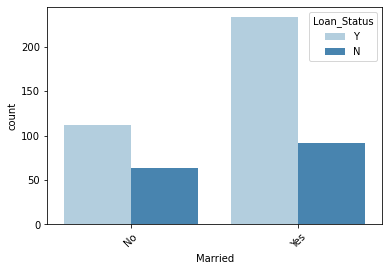

In [17]:
sns.countplot(data=df_cleaned, x="Married", hue="Loan_Status" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari data status perkawinan, kami dapatkan insight bahwa: </br>
1. Sebagian besar pengajuan pinjaman memiliki status perkawinan sudah menikah.
2. Pengajuan pinjaman dengan status belum menikah, lebih memiliki kecenderungan untuk ditolak daripada sudah menikah

### Explore Dependents Feature

In [18]:
dependent = df_cleaned.groupby(['Dependents','Loan_Status']).size().reset_index(name='Count')
dependent['percentage_dependent'] = dependent['Count'].div(dependent.groupby('Dependents')['Count'].transform('sum')).mul(100)
dependent

,Dependents,Loan_Status,Count,percentage_dependent
0,0,N,91,30.33333
1,0,Y,209,69.66667
2,1,N,31,38.27160
3,1,Y,50,61.72840
4,2,N,18,22.78481
5,2,Y,61,77.21519
6,3,N,15,37.50000
7,3,Y,25,62.50000


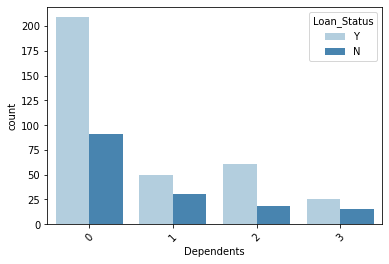

In [19]:
sns.countplot(data=df_cleaned, x="Dependents", hue="Loan_Status" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari data dependents atau jumlah tanggungan, didapatkan insight: </br>
1. Sebagian besar pengajuan pinjaman belum memiliki tanggungan.
2. Pengajuan pinjaman dengan jumlah tanggungan 1 dan 3 lebih cenderung untuk ditolak dibandingkan dengan tanpa tanggungan atau 2 tanggungan

### Explore Education Feature

In [20]:
educate = df_cleaned.groupby(['Education','Loan_Status']).size().reset_index(name='Count')
educate['percentage_education'] = educate['Count'].div(educate.groupby('Education')['Count'].transform('sum')).mul(100)
educate

,Education,Loan_Status,Count,percentage_education
0,Graduate,N,113,28.75318
1,Graduate,Y,280,71.24682
2,Not Graduate,N,42,39.25234
3,Not Graduate,Y,65,60.74766


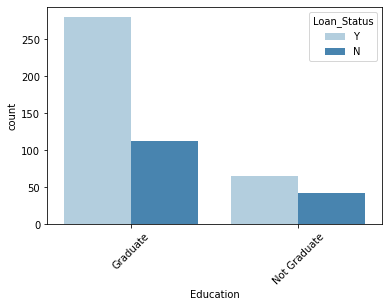

In [21]:
sns.countplot(data=df_cleaned, x="Education", hue="Loan_Status" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari data pendidikan, didapatkan insight: </br>
1. Sebagian besar pengajuan pinjaman memiliki pendidikan graduate.
2. Pengajuan pinjaman dengan pendidikan not graduate lebih cenderung untuk ditolak dibandingkan dengan graduate

### Explore Self-Employed

In [22]:
selfemp = df_cleaned.groupby(['Self_Employed','Loan_Status']).size().reset_index(name='Count')
selfemp['percentage_selfemp'] = selfemp['Count'].div(selfemp.groupby('Self_Employed')['Count'].transform('sum')).mul(100)
selfemp

,Self_Employed,Loan_Status,Count,percentage_selfemp
0,No,N,134,30.87558
1,No,Y,300,69.12442
2,Yes,N,21,31.81818
3,Yes,Y,45,68.18182


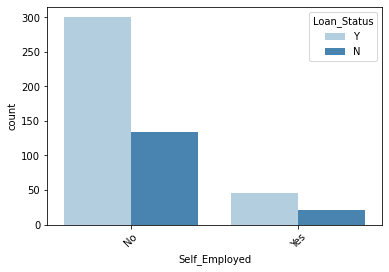

In [23]:
sns.countplot(data=df_cleaned, x="Self_Employed", hue="Loan_Status" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari data self employed, didapatkan insight sebagian besar pengajuan pinjaman tidak self employed

### Explore Property Area

In [24]:
area = df_cleaned.groupby(['Property_Area','Loan_Status']).size().reset_index(name='Count')
area['percentage_area'] = area['Count'].div(area.groupby('Property_Area')['Count'].transform('sum')).mul(100)
area

,Property_Area,Loan_Status,Count,percentage_area
0,Rural,N,56,39.71631
1,Rural,Y,85,60.28369
2,Semiurban,N,39,20.74468
3,Semiurban,Y,149,79.25532
4,Urban,N,60,35.08772
5,Urban,Y,111,64.91228


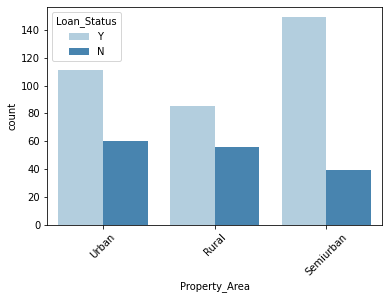

In [25]:
sns.countplot(data=df_cleaned, x="Property_Area", hue="Loan_Status" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari data property area, didapatkan insight: </br>
1. Pengajuan pinjaman dengan area semi urban lebih banyak dibandingkan dengan area urban dan rural
2. Pengajuan pinjaman dengan area rural lebih cenderung untuk ditolak dibandingkan dengan area semiurban dan urban

### Kesimpulan Data Exploration

1. Dari keseluruhan data, terdapat 69% data yang mendapatkan pinjaman, dan sisanya sebesar 31.0% tidak mendapatkan pinjaman
2. Dari data Gender kami dapatkan insight bahwa:</br>
    1. Sebagian besar peminjam memiliki Gender Pria
    2. Rata-rata pengajuan pinjaman dengan peminjam yang memiliki Gender Wanita, lebih cenderung untuk ditolak daripada Pria
3. Dari data status perkawinan, kami dapatkan insight bahwa: </br>
    1. Sebagian besar pengajuan pinjaman memiliki status perkawinan sudah menikah.
    2. Pengajuan pinjaman dengan status belum menikah, lebih memiliki kecenderungan untuk ditolak daripada sudah menikah
4. Dari data dependents atau jumlah tanggungan, didapatkan insight: </br>
    1. Sebagian besar pengajuan pinjaman belum memiliki tanggungan.
    2. Pengajuan pinjaman dengan jumlah tanggungan 1 dan 3 lebih cenderung untuk ditolak dibandingkan dengan tanpa tanggungan atau 2 tanggungan
5. Dari data pendidikan, didapatkan insight: </br>
    1. Sebagian besar pengajuan pinjaman memiliki pendidikan graduate.
    2. Pengajuan pinjaman dengan pendidikan not graduate lebih cenderung untuk ditolak dibandingkan dengan graduate.
6. Dari data property area, didapatkan insight: </br>
    1. Pengajuan pinjaman dengan area semi urban lebih banyak dibandingkan dengan area urban dan rural
    2. Pengajuan pinjaman dengan area rural lebih cenderung untuk ditolak dibandingkan dengan area semiurban dan urban

## vi. Data Preprocessing

In [26]:
#Melihat daftar kolom yang ada
df_encoded = df_cleaned.copy()
df_encoded.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income         float64
dtype: object

In [27]:
#Ubah feature Loan Status dari Y dan N menjadi 1 dan 0
df_encoded.Loan_Status= df_encoded.Loan_Status.map(dict(Y=1, N=0))


In [28]:
#Kami menghapus fitur applicant income dan coapplicant income dikarenakan untuk fitur tersebut sudah tercover dengan fitur Total Income
df_encoded.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace=True)

In [29]:
#Pengecekan kolom dengan nilai kategorikal
kategori = [col for col in df_encoded.columns if df_encoded[col].dtypes == 'O']

kategori

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [30]:
categorical = ['Gender','Married','Education','Self_Employed','Property_Area']

In [31]:
# Pembuatan categorical mask
categorical_feature_mask = df_encoded.dtypes == object
# Pembuatan categorical feature menjadi list
categorical_cols = df_encoded.columns[categorical_feature_mask].tolist()

# Definisi OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
# Aplikasi One Hot Encoder pada data
ohe.fit(df_encoded[categorical_cols])
cat_ohe = ohe.transform(df_encoded[categorical_cols])

#Pembuatan DataFrame dari fitur yang sudah diencode
ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = categorical_cols))
#Penggabungan original data dengan dataframe encoded
df_ohe = pd.concat([df_encoded, ohe_df], axis=1).drop(columns = categorical_cols, axis=1)


In [32]:
df_ohe

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,144.02075,360.00000,1.00000,1,5849.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
1,1,128.00000,360.00000,1.00000,0,6091.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000
2,0,66.00000,360.00000,1.00000,1,3000.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
3,0,120.00000,360.00000,1.00000,1,4941.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
4,0,141.00000,360.00000,1.00000,1,6000.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,105.00000,84.00000,1.00000,1,4239.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
496,0,107.00000,360.00000,1.00000,1,4300.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000
497,0,111.00000,12.00000,1.00000,1,7482.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
498,1,95.00000,360.00000,1.00000,1,2895.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000


In [33]:
#Proses definisi X dan Y
y = df_ohe['Loan_Status'].values
X = df_ohe.drop(columns=['Loan_Status'],axis=1).values

In [34]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## vii. Definisi Model
Kami akan menggunakan Pipeline untuk melakukan scaling data dan untuk melakukan training data. </br>
Kami juga akan sekaligus melakukan mendefinisikan hyperparameter yang akan digunakan untuk tuning dengan menggunakan GridSearchCV untuk mencari parameter terbaik dari model yang kami uji. </br>
Terdapat 7 model yang akan kami lakukan pengujian yaitu:
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. K Nearest Neighbors
6. Gradient Boosting
7. XGBoost

In [35]:
#Definisi Model Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(random_state=42))])
pipe_svm = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])
pipe_gb = Pipeline([('scl', StandardScaler()), ('clf', GradientBoostingClassifier())])
pipe_xgb= Pipeline([('scl', StandardScaler()), ('clf', xgb.XGBClassifier(use_label_encoder=False))])

In [36]:
#Definisi Hyperparameter untuk GridSearch CV
grid_params_lr = [{'clf__penalty': ['l2'],
		'clf__C': [100, 10, 1.0, 0.1, 0.01],
		'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__n_estimators': [10, 25, 50, 100, 250],
		'clf__max_features': ['auto','sqrt','log2']}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': [100, 10, 1.0, 0.1, 0.01]}]

grid_params_dt = [{'clf__criterion': ['gini', 'entropy'],
		'clf__splitter': ['best','random'],
		'clf__max_features': ['auto','sqrt','log2']}]

grid_params_knn = [{'clf__n_neighbors': [1,5,10,25,50],
		'clf__weights': ['uniform','distance'],
		'clf__algorithm': ['auto','ball_tree','kd_tree','brute']}]

grid_params_gb = [{'clf__loss': ['deviance', 'exponential'],
		'clf__learning_rate': [100, 10, 1.0, 0.1, 0.01],
		'clf__n_estimators': [10, 25, 50, 100, 250],
		'clf__max_features': ['auto','sqrt','log2']}]

grid_params_xgb = [{'clf__booster': ['gbtree', 'gblinear','dart'],
		'clf__learning_rate': [100, 10, 1.0, 0.1, 0.01],
		'clf__n_estimators': [10, 25, 50, 100, 250],
		'clf__eval_metric': ['logloss','auc']}]


In [37]:
#Definisi GridSearchCV untuk masing-masing model
gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10) 
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='f1',
			cv=10)
gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='f1',
			cv=10)
gs_dt = GridSearchCV(estimator=pipe_dt,
			param_grid=grid_params_dt,
			scoring='f1',
			cv=10)
gs_knn = GridSearchCV(estimator=pipe_knn,
			param_grid=grid_params_knn,
			scoring='f1',
			cv=10)
gs_gb = GridSearchCV(estimator=pipe_gb,
			param_grid=grid_params_gb,
			scoring='f1',
			cv=10)
gs_xgb = GridSearchCV(estimator=pipe_xgb,
			param_grid=grid_params_xgb,
			scoring='f1',
			cv=10)

grids = [gs_lr, gs_rf, gs_svm,gs_dt,gs_knn,gs_gb,gs_xgb]


In [38]:
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 
		2: 'Support Vector Machine', 3: 'Decision Tree', 4: 'K Nearest Neighbors',5:'Gradient Boosting',6:'XGBoost'}

Pada definisi gridsearchcv, kami memilih jenis score yang ingin kami optimalkan adalah nilai f1 score, dikarenakan kami ingin menemukan perpaduan antara nilai precision dan recall yang optimal </br>

## viii. Model Training
Model training akan dilakukan sekaligus dengan hyperparameter tuning untuk memilih mana model dan hyperparameter yang terbaik.

In [39]:
#Model training sekaligus dengan hyperparameter tuning dengan menggunakan gridsearchcv
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 100, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
Best training accuracy: 0.874
Test set F1 score for best params: 0.895 

Estimator: Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_features': 'auto', 'clf__n_estimators': 50}
Best training accuracy: 0.838
Test set F1 score for best params: 0.867 

Estimator: Support Vector Machine
Best params: {'clf__C': 100, 'clf__kernel': 'linear'}
Best training accuracy: 0.873
Test set F1 score for best params: 0.895 

Estimator: Decision Tree
Best params: {'clf__criterion': 'gini', 'clf__max_features': 'auto', 'clf__splitter': 'random'}
Best training accuracy: 0.797
Test set F1 score for best params: 0.771 

Estimator: K Nearest Neighbors
Best params: {'clf__algorithm': 'auto', 'clf__n_neighbors': 10, 'clf__weights': 'uniform'}
Best training accuracy: 0.839
Test set F1 score for best params: 0.852 

Estimator: Gradient Boosting
Best params

Dari hasil training beberapa model diatas, didapatkan hasil bahwa model yang dipilih yaitu model dengan nilai akurasi dan f1 score tertinggi adalah model Logistic Regression. </br>
Parameter yang paling baik dari model logistic regression yang dipilih adalah :</br>
1. Nilai C = 100
2. Penalty = l2
3. Solver = newton-cg

## ix. Model Evaluation

In [40]:
#Prediksi target berdasarkan model yang dipilih
y_pred = best_gs.predict(X_test)

In [41]:
#Perbandingan hasil nilai y aktual dengan nilai y hasil prediksi model logistic regression
predicted = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
predicted.value_counts()

Actual  Predicted
1       1            68
0       0            16
        1            15
1       0             1
dtype: int64

In [42]:
#Pembuatan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[16 15]
 [ 1 68]]


In [43]:
#Perhitungan kategori dalam confusion matrix
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]

print('True Positives(TP) = ', tp)
print('True Negatives(TN) = ', tn)
print('False Positives(FP) = ', fp)
print('False Negatives(FN) = ', fn)

True Positives(TP) =  68
True Negatives(TN) =  16
False Positives(FP) =  15
False Negatives(FN) =  1


In [44]:
# Perhitungan evaluation metrics
accu = (tp+tn)/(tp+tn+fp+fn)
misclass = (fn+fp)/(tp+tn+fp+fn)
precis = tp/(tp+fp)
sensi = tp/(tp+fn)
speci = tn/(tn+fp)
f1 = 2 * (precis*sensi) / (precis+sensi)


print('Accuracy is ',accu)
print('Misclassification is ',misclass)
print('Precision is ',precis)
print('Sensitivity is ',sensi)
print('Specificity is',speci)
print('F-1 Score is ',f1)


Accuracy is  0.84
Misclassification is  0.16
Precision is  0.8192771084337349
Sensitivity is  0.9855072463768116
Specificity is 0.5161290322580645
F-1 Score is  0.8947368421052633


In [45]:
#Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67        31
           1       0.82      0.99      0.89        69

    accuracy                           0.84       100
   macro avg       0.88      0.75      0.78       100
weighted avg       0.86      0.84      0.82       100



Dari hasil evaluasi, didapatkan hasil: </br>
1. Nilai Akurasi sebesar 84% yang berarti dari total data yang ada, model ini memprediksi 84% data yang benar positif maupun benar negatif
2. Nilai Misclassification 16% yang berarti dari total data yang ada, model ini memprediksi 16% data yang salah positif maupun salah negatif
3. Nilai Precision sebesar 82% yang berarti dari total data yang diprediksi positif, terdapat 82% data yang benar positif
4. Nilai Sensitivity / Recall sebesar 99% yang berarti dari total data yang sebenarnya positif, model ini memprediksi 99% data yang benar positif
5. Nilai Specificity sebesar 52% yang berarti dari total data yang sebenarnya negatif, model ini memprediksi 52% data yang benar negatif
6. Nilai F1 Score sebesar 89% yang berarti rata-rata nilai precision dan recall adalah sebesar 89%

Dikarenakan model diatas memiliki nilai Akurasi, Precision, Recall dan F1 Score yang tinggi, maka dapat dikatakan bahwa model tersebut sudah cukup bagus dalam memprediksi approval dari data pengajuan pinjaman ini

## x. Model Saving

In [46]:
#Proses Saving Model
pickle.dump(best_gs,open('mls2model.pkl','wb'))

In [47]:
#Proses Saving dari encoder one hot encoding
joblib.dump(ohe, 'encoder.joblib')


['encoder.joblib']

## xi. Model Inference

In [48]:
#Proses Pembuatan Data Sample
sampledf= df_cleaned.sample(n=100).reset_index()
sampledf.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,409,Male,Yes,3,Graduate,No,81000,0.00000,360.00000,360.00000,0.00000,Rural,N,81000.00000
1,380,Male,Yes,0,Graduate,No,3333,2500.00000,128.00000,360.00000,1.00000,Semiurban,Y,5833.00000
2,373,Male,No,1,Graduate,No,3062,1987.00000,111.00000,180.00000,0.00000,Urban,N,5049.00000
3,223,Male,Yes,0,Graduate,No,7578,1010.00000,175.00000,360.00000,1.00000,Semiurban,Y,8588.00000
4,301,Male,Yes,0,Not Graduate,No,2875,1750.00000,105.00000,360.00000,1.00000,Semiurban,Y,4625.00000


In [49]:
#Ubah feature Loan Status dari Yes/No menjadi 1-0
sampledf.Loan_Status= sampledf.Loan_Status.map(dict(Y=1, N=0))
#Hapus kolom ApplicantIncome dan Coapplicant Income
sampledf.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace=True)
#Hapus kolom index
sampledf.drop(columns=['index'], inplace=True)


In [50]:
#Encode data sample
sample_ohe = ohe.transform(sampledf[categorical_cols])

#Create a Pandas DataFrame of the hot encoded column
sample_ohe_df = pd.DataFrame(sample_ohe, columns = ohe.get_feature_names(input_features = categorical_cols))

#concat with original data and drop original columns
sampleencoded = pd.concat([sampledf, sample_ohe_df], axis=1).drop(columns = categorical_cols, axis=1)


In [51]:
sampleencoded

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3,360.00000,360.00000,0.00000,0,81000.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000
1,0,128.00000,360.00000,1.00000,1,5833.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
2,1,111.00000,180.00000,0.00000,0,5049.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
3,0,175.00000,360.00000,1.00000,1,8588.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
4,0,105.00000,360.00000,1.00000,1,4625.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,570.00000,360.00000,1.00000,0,24996.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000
96,1,104.00000,360.00000,1.00000,1,4545.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
97,0,135.00000,360.00000,1.00000,0,5566.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000
98,0,165.00000,180.00000,0.00000,0,6058.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000


In [52]:
#Proses definisi X dan Y sample
y_sample = sampleencoded['Loan_Status'].values
X_sample = sampleencoded.drop(columns=['Loan_Status'],axis=1).values

In [53]:
#Proses prediksi data sample menggunakan model yang dipilih
y_pred_sample = best_gs.predict(X_sample)

In [54]:
#Perbandingan hasil nilai y aktual dengan nilai y hasil prediksi model logistic regression
predictedsample = pd.DataFrame({'Actual': y_sample,'Predicted': y_pred_sample})
predictedsample.value_counts()

Actual  Predicted
1       1            65
0       0            19
        1            14
1       0             2
dtype: int64

In [55]:
#Pembuatan confusion matrix
cmsample = confusion_matrix(y_sample, y_pred_sample)
print('Confusion matrix\n\n', cmsample)

#Perhitungan kategori dalam confusion matrix
tpsample = cmsample[1,1]
tnsample = cmsample[0,0]
fpsample = cmsample[0,1]
fnsample = cmsample[1,0]

print('True Positives(TP) = ', tpsample)
print('True Negatives(TN) = ', tnsample)
print('False Positives(FP) = ', fpsample)
print('False Negatives(FN) = ', fnsample)

# Perhitungan evaluation metrics
accusample = (tpsample+tnsample)/(tpsample+tnsample+fpsample+fnsample)
misclasssample = (fnsample+fpsample)/(tpsample+tnsample+fpsample+fnsample)
precissample = tpsample/(tpsample+fpsample)
sensisample = tpsample/(tpsample+fnsample)
specisample = tnsample/(tnsample+fpsample)
f1sample = 2 * (precissample*sensisample) / (precissample+sensisample)


print('Accuracy of Random Forest Tuned is ',accusample)
print('Misclassification of Random Forest Tuned is ',misclasssample)
print('Precision of Random Forest Tuned is ',precissample)
print('Sensitivity of Random Forest Tuned is ',sensisample)
print('Specificity of Random Forest Tuned is ',specisample)
print('F-1 Score of Random Forest Tuned is ',f1sample)


Confusion matrix

 [[19 14]
 [ 2 65]]
True Positives(TP) =  65
True Negatives(TN) =  19
False Positives(FP) =  14
False Negatives(FN) =  2
Accuracy of Random Forest Tuned is  0.84
Misclassification of Random Forest Tuned is  0.16
Precision of Random Forest Tuned is  0.8227848101265823
Sensitivity of Random Forest Tuned is  0.9701492537313433
Specificity of Random Forest Tuned is  0.5757575757575758
F-1 Score of Random Forest Tuned is  0.8904109589041096


Dalam melakukan model inference, kami mengambil data random sample dari data yang sudah di cleaning </br>
Kemudian kami melakukan pada data sampel tersebut baru selanjutnya kami lakukan prediksi berdasarkan model yang sudah dipilih</br>
Dan kemudian dapat kita lakukan evaluasi untuk sample data tersebut.

## xii. Kesimpulan

1. Tujuan dari permodelan ini adalah untuk memprediksi approval dari pengajuan pinjaman
2. Data yang digunakan adalah data pengajuan pinjaman konsumer
3. Dari data cleaning tidak ditemukan adanya data duplikat, namun terdapat missing values yang kemudian kami lakukan imputasi.
4. Dari data exploration, didapatkan insight: </br>
    1. Dari keseluruhan data, terdapat 69% data yang mendapatkan pinjaman, dan sisanya sebesar 31.0% tidak mendapatkan pinjaman
    2. Dari data Gender kami dapatkan insight bahwa:</br>
        1. Sebagian besar peminjam memiliki Gender Pria
        2. Rata-rata pengajuan pinjaman dengan peminjam yang memiliki Gender Wanita, lebih cenderung untuk ditolak daripada Pria
    3. Dari data status perkawinan, kami dapatkan insight bahwa: </br>
        1. Sebagian besar pengajuan pinjaman memiliki status perkawinan sudah menikah.
        2. Pengajuan pinjaman dengan status belum menikah, lebih memiliki kecenderungan untuk ditolak daripada sudah menikah
    4. Dari data dependents atau jumlah tanggungan, didapatkan insight: </br>
        1. Sebagian besar pengajuan pinjaman belum memiliki tanggungan.
        2. Pengajuan pinjaman dengan jumlah tanggungan 1 dan 3 lebih cenderung untuk ditolak dibandingkan dengan tanpa tanggungan atau 2 tanggungan
    5. Dari data pendidikan, didapatkan insight: </br>
        1. Sebagian besar pengajuan pinjaman memiliki pendidikan graduate.
        2. Pengajuan pinjaman dengan pendidikan not graduate lebih cenderung untuk ditolak dibandingkan dengan graduate.
    6. Dari data property area, didapatkan insight: </br>
        1. Pengajuan pinjaman dengan area semi urban lebih banyak dibandingkan dengan area urban dan rural
        2. Pengajuan pinjaman dengan area rural lebih cenderung untuk ditolak dibandingkan dengan area semiurban dan urban
5. Pada data preprocessing kami melakukan encoding dengan one hot encoder dan kemudian kami definisikan x dan y serta kami lakukan train/test split
6. Kami akan menggunakan Pipeline untuk melakukan scaling data dan untuk melakukan training data. </br>
Kami juga akan sekaligus melakukan hyper parameter tuning dengan menggunakan GridSearchCV untuk mencari parameter terbaik dari model yang kami uji. </br>
Terdapat 7 model yang akan kami lakukan pengujian yaitu: </br>
    1. Logistic Regression
    2. Support Vector Machine
    3. Decision Tree
    4. Random Forest
    5. K Nearest Neighbors
    6. Gradient Boosting
    7. XGBoost
7. Model training akan dilakukan sekaligus dengan hyperparameter tuning untuk memilih mana model dan hyperparameter yang terbaik.
8. Dari hasil training beberapa model diatas, didapatkan hasil bahwa model yang dipilih yaitu model dengan nilai akurasi dan f1 score tertinggi adalah model Logistic Regression. </br>
Parameter yang paling baik dari model logistic regression yang dipilih adalah :</br>
    1. Nilai C = 100
    2. Penalty = l2
    3. Solver = newton-cg
9. Dari hasil evaluasi, didapatkan hasil: </br>
    1. Nilai Akurasi sebesar 84% yang berarti dari total data yang ada, model ini memprediksi 84% data yang benar positif maupun benar negatif
    2. Nilai Misclassification 16% yang berarti dari total data yang ada, model ini memprediksi 16% data yang salah positif maupun salah negatif
    3. Nilai Precision sebesar 82% yang berarti dari total data yang diprediksi positif, terdapat 82% data yang benar positif
    4. Nilai Sensitivity / Recall sebesar 99% yang berarti dari total data yang sebenarnya positif, model ini memprediksi 99% data yang benar positif
    5. Nilai Specificity sebesar 52% yang berarti dari total data yang sebenarnya negatif, model ini memprediksi 52% data yang benar negatif
    6. Nilai F1 Score sebesar 89% yang berarti rata-rata nilai precision dan recall adalah sebesar 89%
    7. Dikarenakan model diatas memiliki nilai Akurasi, Precision, Recall dan F1 Score yang tinggi, maka dapat dikatakan bahwa model tersebut sudah cukup bagus dalam memprediksi approval dari data pengajuan pinjaman ini
10. Kami melakukan saving model serta encoder untuk selanjutnya dilakukan deployment.
11. Dalam melakukan model inference, kami mengambil data random sample dari data yang sudah di cleaning </br>
Kemudian kami melakukan pada data sampel tersebut baru selanjutnya kami lakukan prediksi berdasarkan model yang sudah dipilih</br>

## Model Deployment
Model ini kami deploy pada heroku dengan link https://darmawan-milestone2-project.herokuapp.com/predict
